<a href="https://colab.research.google.com/github/parisazeynaly/Stroke-prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stroke Prediction

#### Our top priority in this health problem is to identify patients with a stroke.

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.<br>
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

<b>Attribute Information</b>

1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient<br>

In [ ]:
!git clone https://github.com/parisazeynaly/Stroke-prediction.git

Cloning into 'Stroke-prediction'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 107 (delta 40), reused 83 (delta 23), pack-reused 0 (from 0)
Receiving objects: 100% (107/107), 909.20 KiB | 6.94 MiB/s, done.
Resolving deltas: 100% (40/40), done.


### Import libraries

In [1]:
import pandas as pd
import numpy as np
import joblib
import logging
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Load the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

print("--- First 5 rows of the dataset ---")
print(df.head())

print("\n--- Dataset Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n--- Dataset Information ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe())


--- First 5 rows of the dataset ---
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

--- Dataset Shape -

In [ ]:
print("\n--- Missing Values Count per Column ---")
print(df.isna().sum())

print("\n--- Column Names ---")
print(df.columns.tolist())



--- Missing Values Count per Column ---
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

--- Column Names ---
['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [ ]:
### 3. Handle Missing Values (BMI)

# The 'bmi' column has missing values, which will be imputed using KNNImputer.
imputer = KNNImputer(n_neighbors=5)
df['bmi'] = imputer.fit_transform(df[['bmi']])

print("\n--- Missing Values after BMI Imputation ---")
print(df.isna().sum())


--- Missing Values after BMI Imputation ---
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
# from sklearn.impute import KNNImputer

In [ ]:
# imputer = KNNImputer(n_neighbors = 5)
# df['bmi'] = imputer.fit_transform(df[['bmi']])

### Exploratory Data Analysis

--- Stroke vs. Non-Stroke Distribution ---


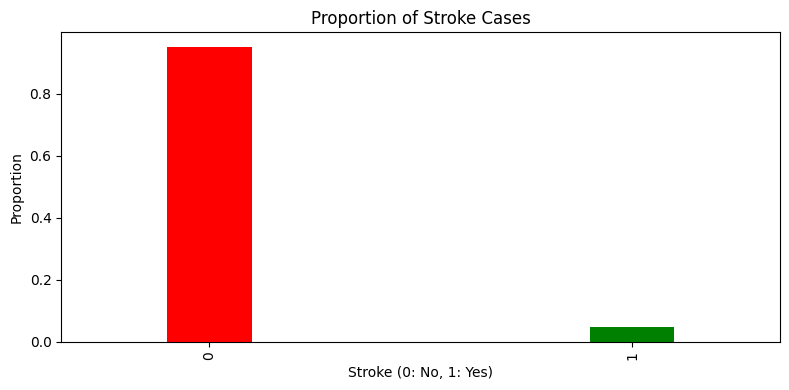

In [ ]:
### 4. Exploratory Data Analysis (EDA)

# EDA helps to analyze and investigate data sets and summarize their main characteristics,
# often employing data visualization methods.
# Libraries for visualization (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
print("--- Stroke vs. Non-Stroke Distribution ---")
fig, axes = plt.subplots(figsize=(8, 4))
df['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('red','green'))
plt.title('Proportion of Stroke Cases')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

In [ ]:
cols = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
cols.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.600000
1,61.0,0,0,202.21,28.893237
2,80.0,0,1,105.92,32.500000
3,49.0,0,0,171.23,34.400000
4,79.0,1,0,174.12,24.000000


/tmp/ipython-input-10-2726950616.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cols[column])
/tmp/ipython-input-10-2726950616.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cols[column])
/tmp/ipython-input-10-2726950616.py:9: UserWarning: 

`distplot` is a deprecated function and will

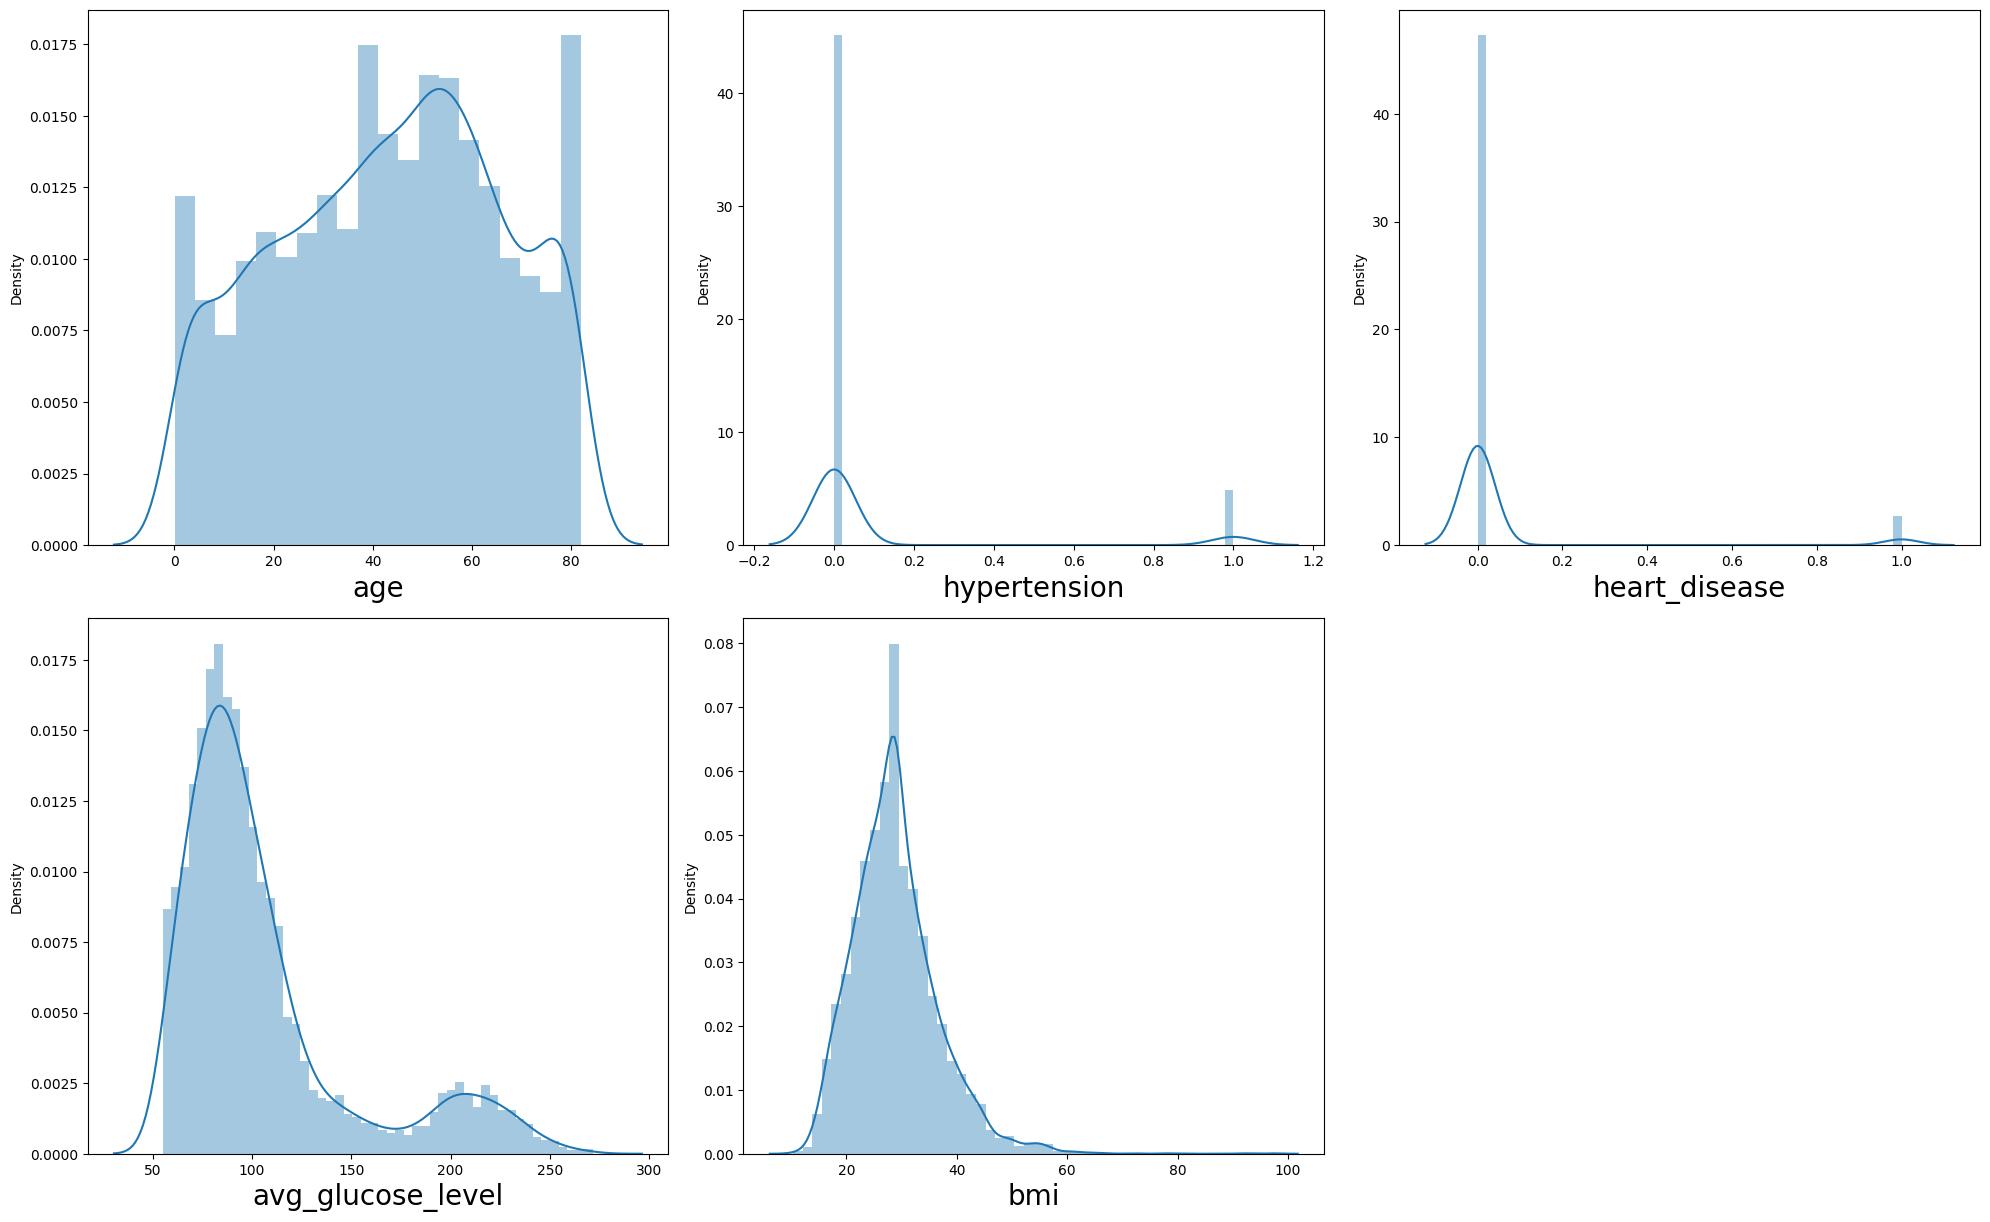

In [ ]:
# lets see how data is distributed for every column
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(cols[column])
        plt.xlabel(column, fontsize=20)

    plotnumber+=1
plt.tight_layout()

In [ ]:
# Optional: For comprehensive data profiling
# !pip install pandas_profiling[notebook] # Uncomment and run if you want to generate the profile report
# from pandas_profiling import ProfileReport


--- Distribution of Numerical Features (Histogram/KDE) ---


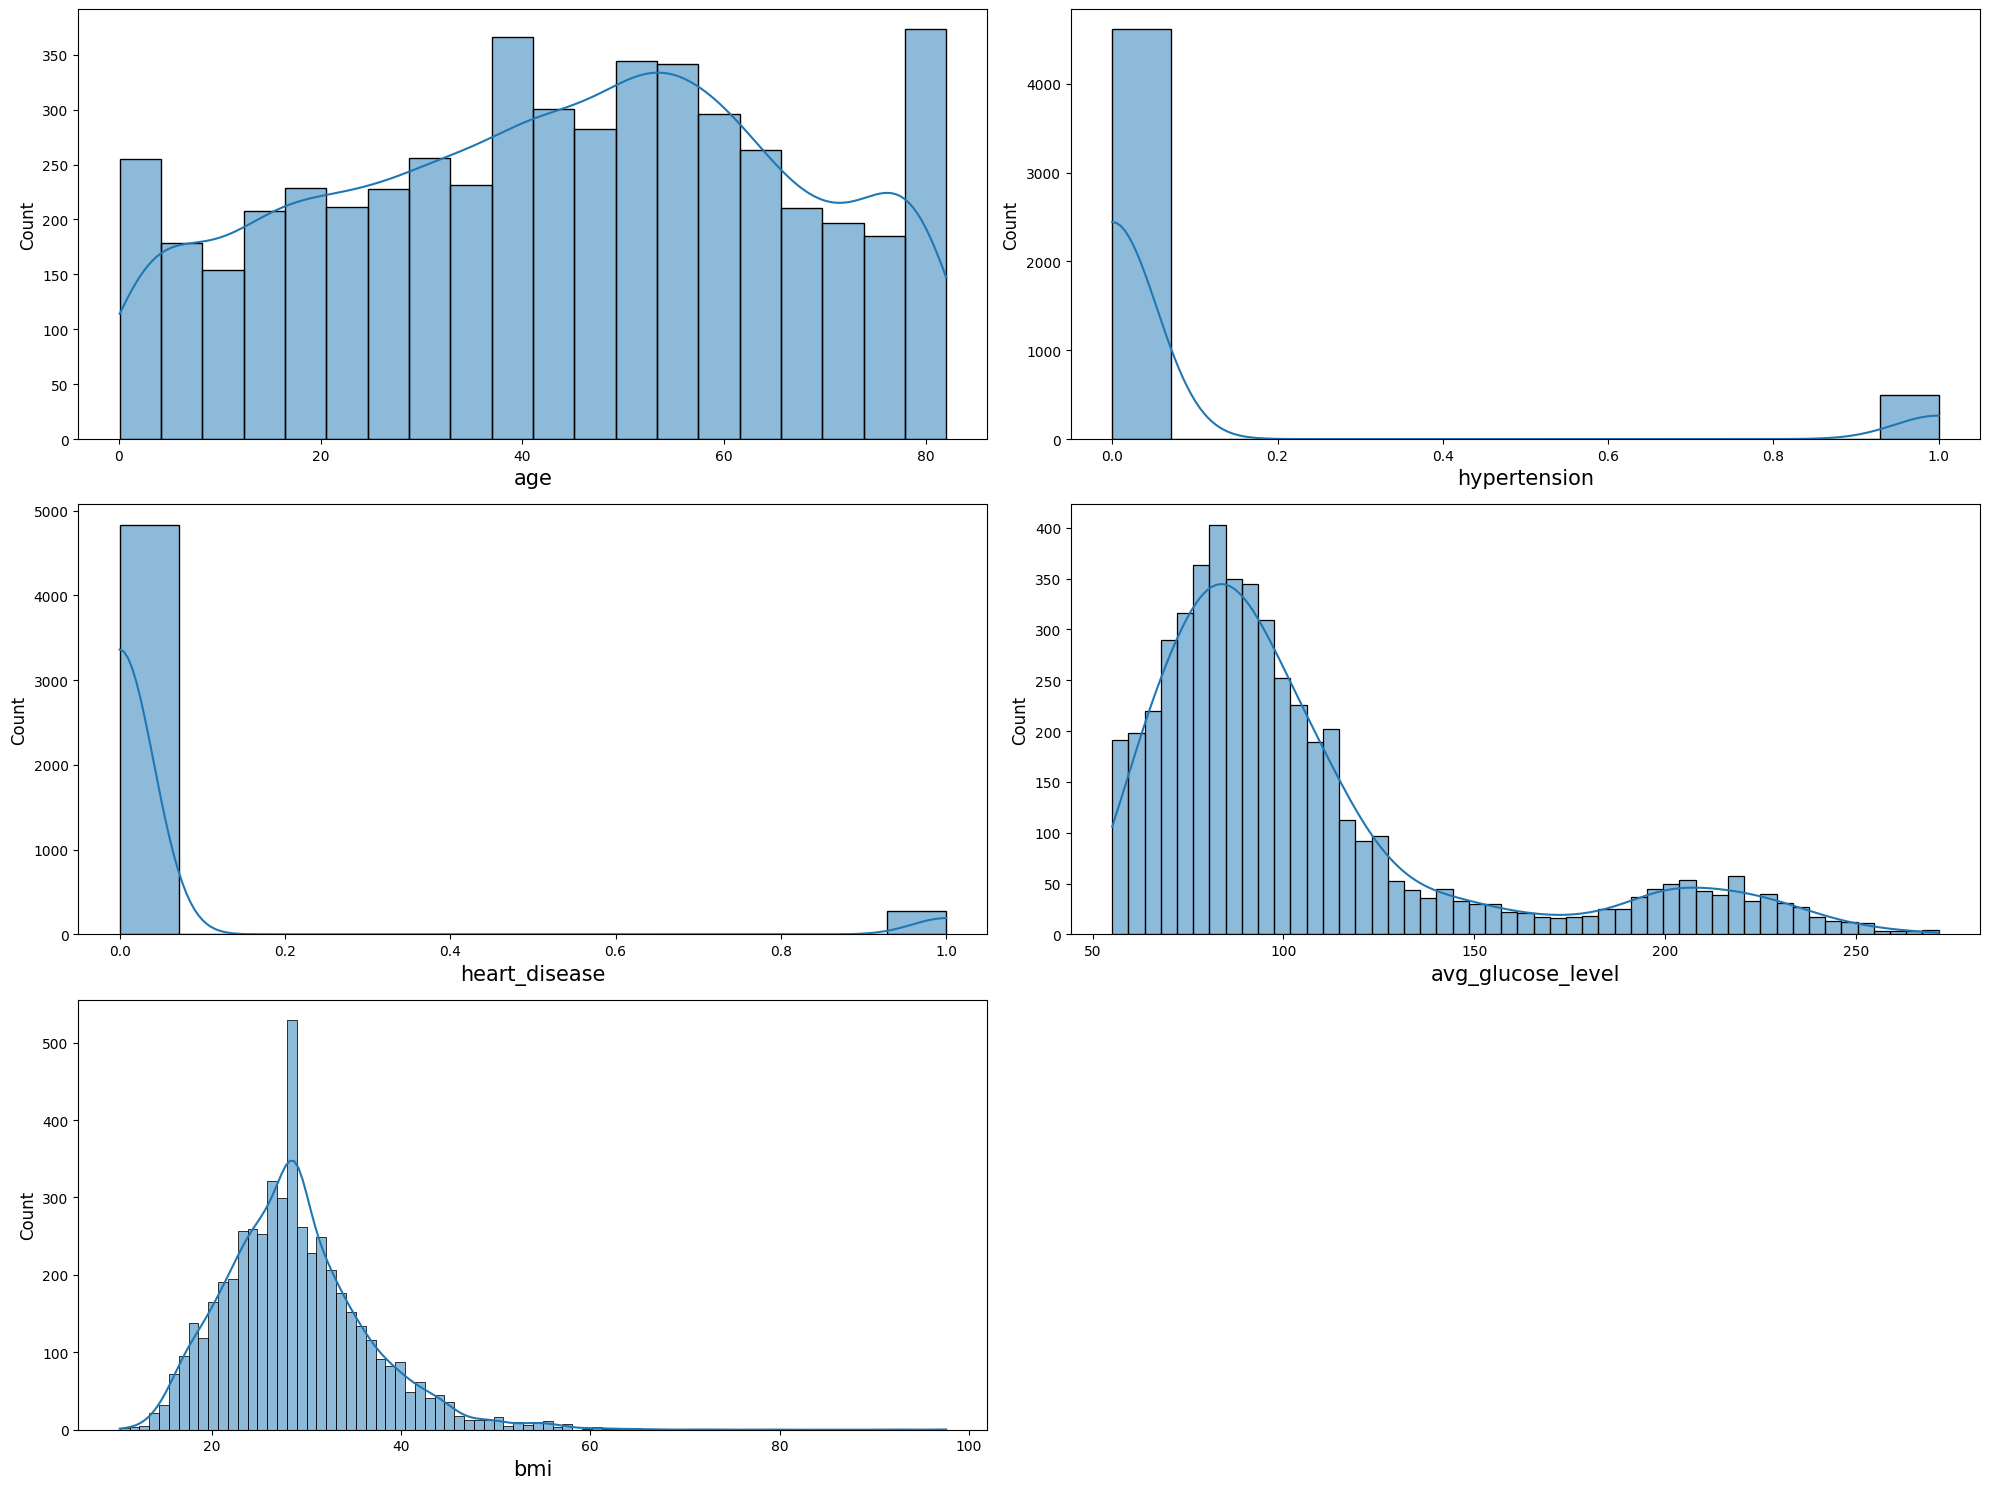


--- Outlier Detection for Numerical Features (Box Plots) ---


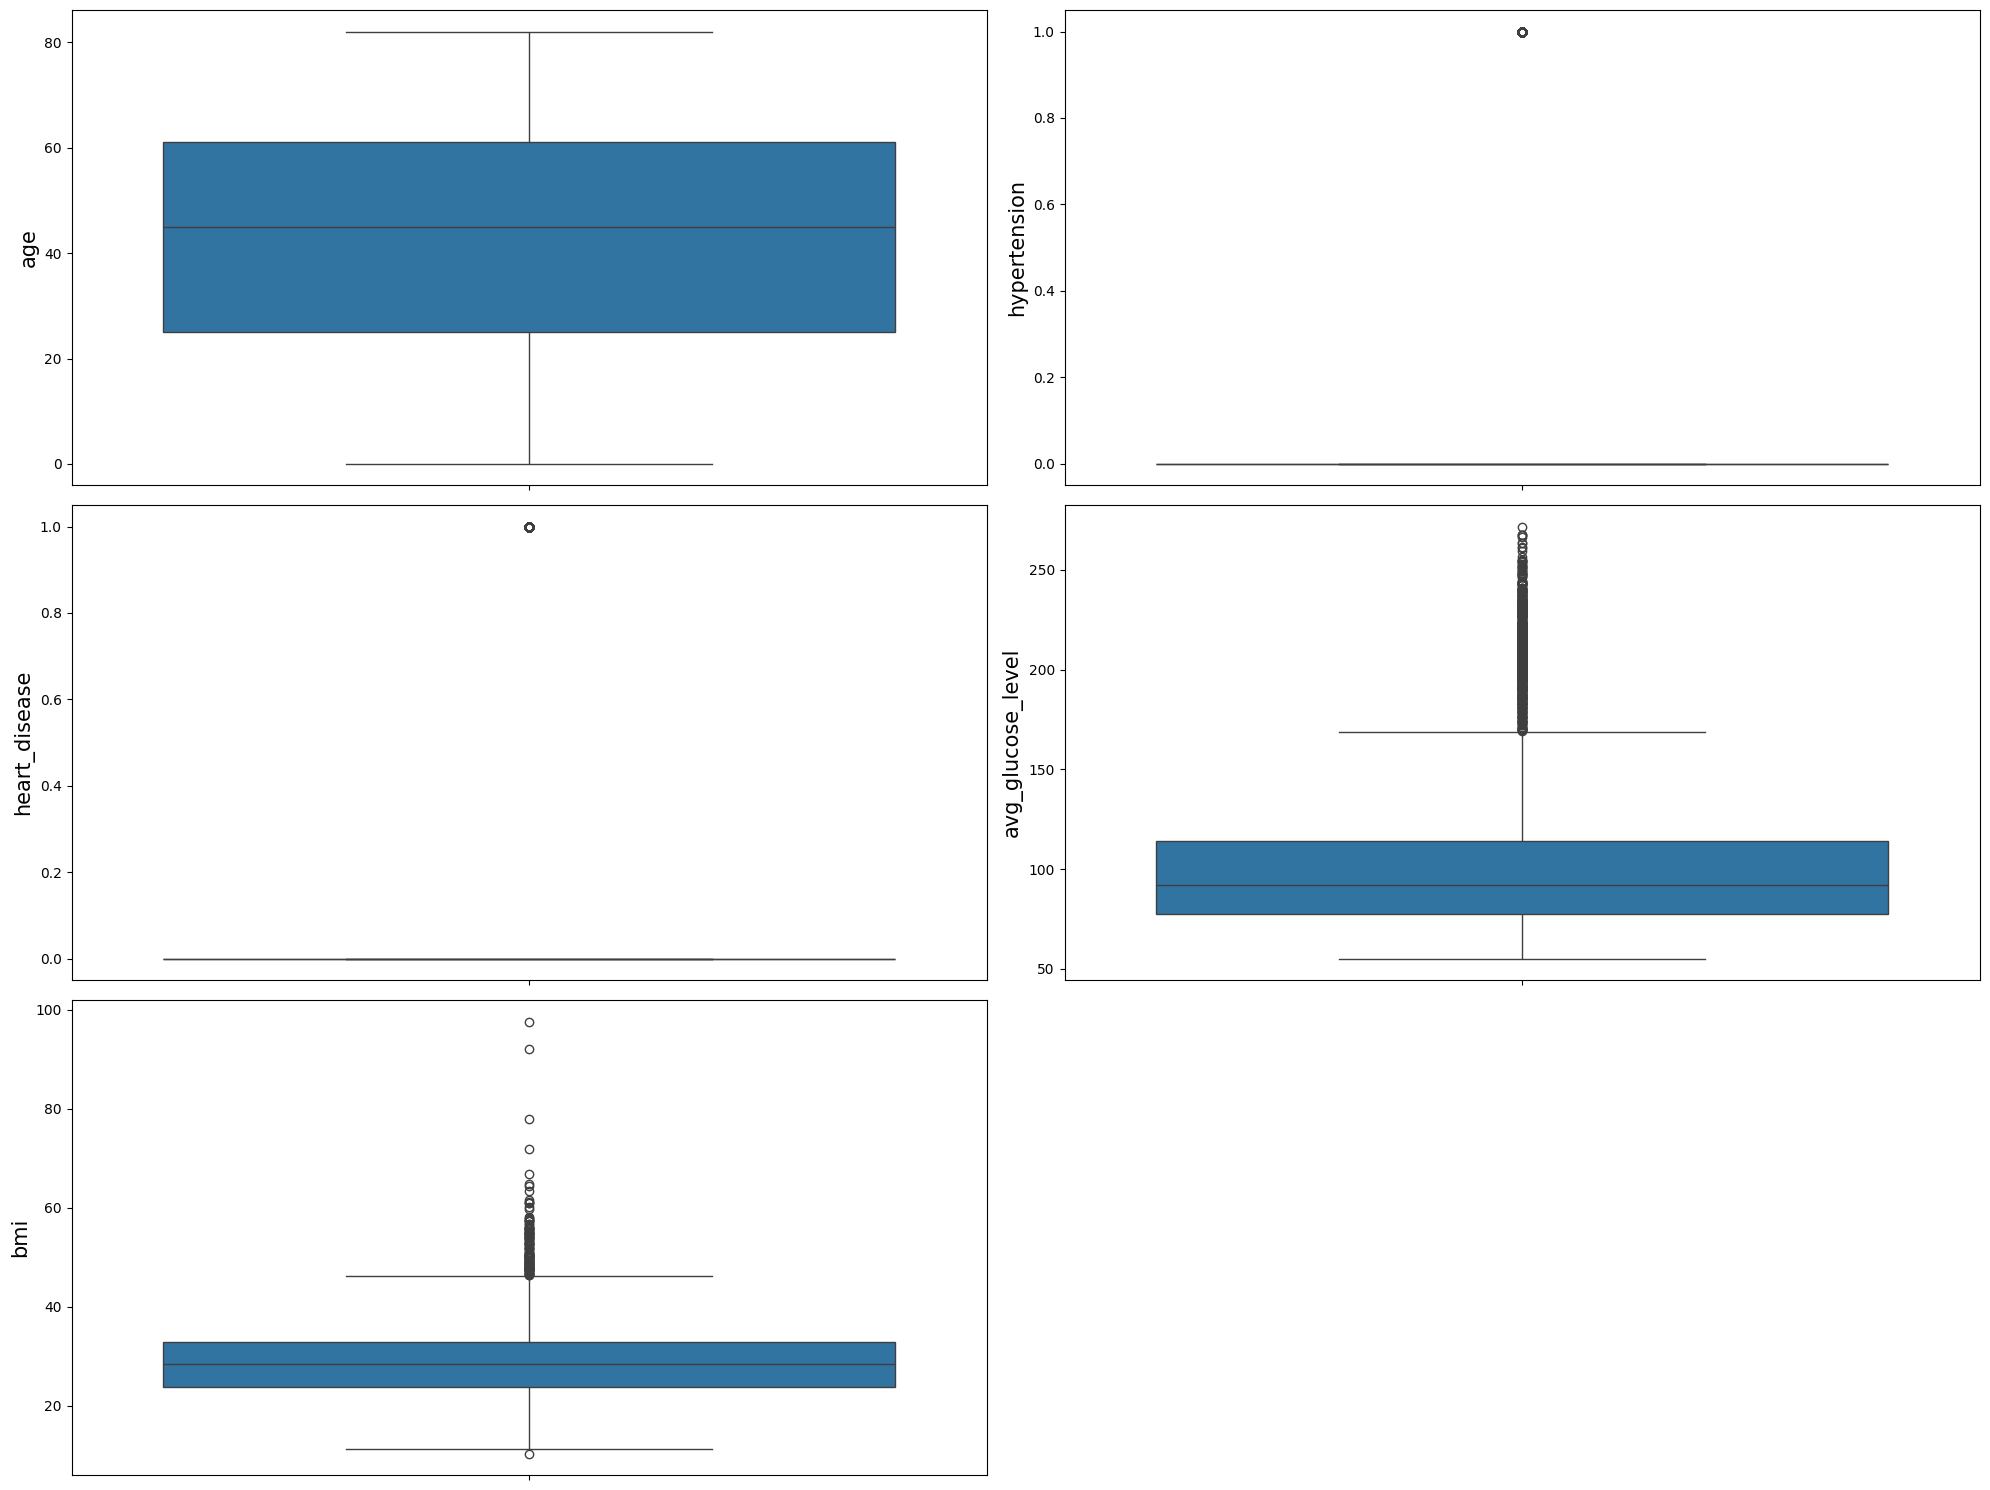


--- Distribution of Categorical Features (Count Plots) ---


In [ ]:
# Selecting numerical columns for distribution and outlier analysis
numerical_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

print("\n--- Distribution of Numerical Features (Histogram/KDE) ---")
plt.figure(figsize=(20, 15)) # Adjusted figure size for better display
plotnumber = 1
for column in numerical_cols:
    if plotnumber <= len(numerical_cols):
        ax = plt.subplot(3, 2, plotnumber) # Adjusted subplot grid
        sns.histplot(df[column], kde=True, ax=ax)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Density' if 'kde' in str(type(ax)) else 'Count', fontsize=12) # Dynamic label
    plotnumber += 1
plt.tight_layout()
plt.show()

print("\n--- Outlier Detection for Numerical Features (Box Plots) ---")
plt.figure(figsize=(20, 15)) # Adjusted figure size
plotnumber = 1
for column in numerical_cols:
    if plotnumber <= len(numerical_cols):
        ax = plt.subplot(3, 2, plotnumber) # Adjusted subplot grid
        sns.boxplot(y=df[column], ax=ax) # Use y for vertical box plot
        plt.ylabel(column, fontsize=15)
    plotnumber += 1
plt.tight_layout()
plt.show()

print("\n--- Distribution of Categorical Features (Count Plots) ---")

# The commented-out barplot code was good, let's include a similar one.


/tmp/ipython-input-13-949429314.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], ax=ax, palette='viridis')
/tmp/ipython-input-13-949429314.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], ax=ax, palette='viridis')
/tmp/ipython-input-13-949429314.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], ax=ax, palette='viridis')
/tmp/ipython-input-13-949429314.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to

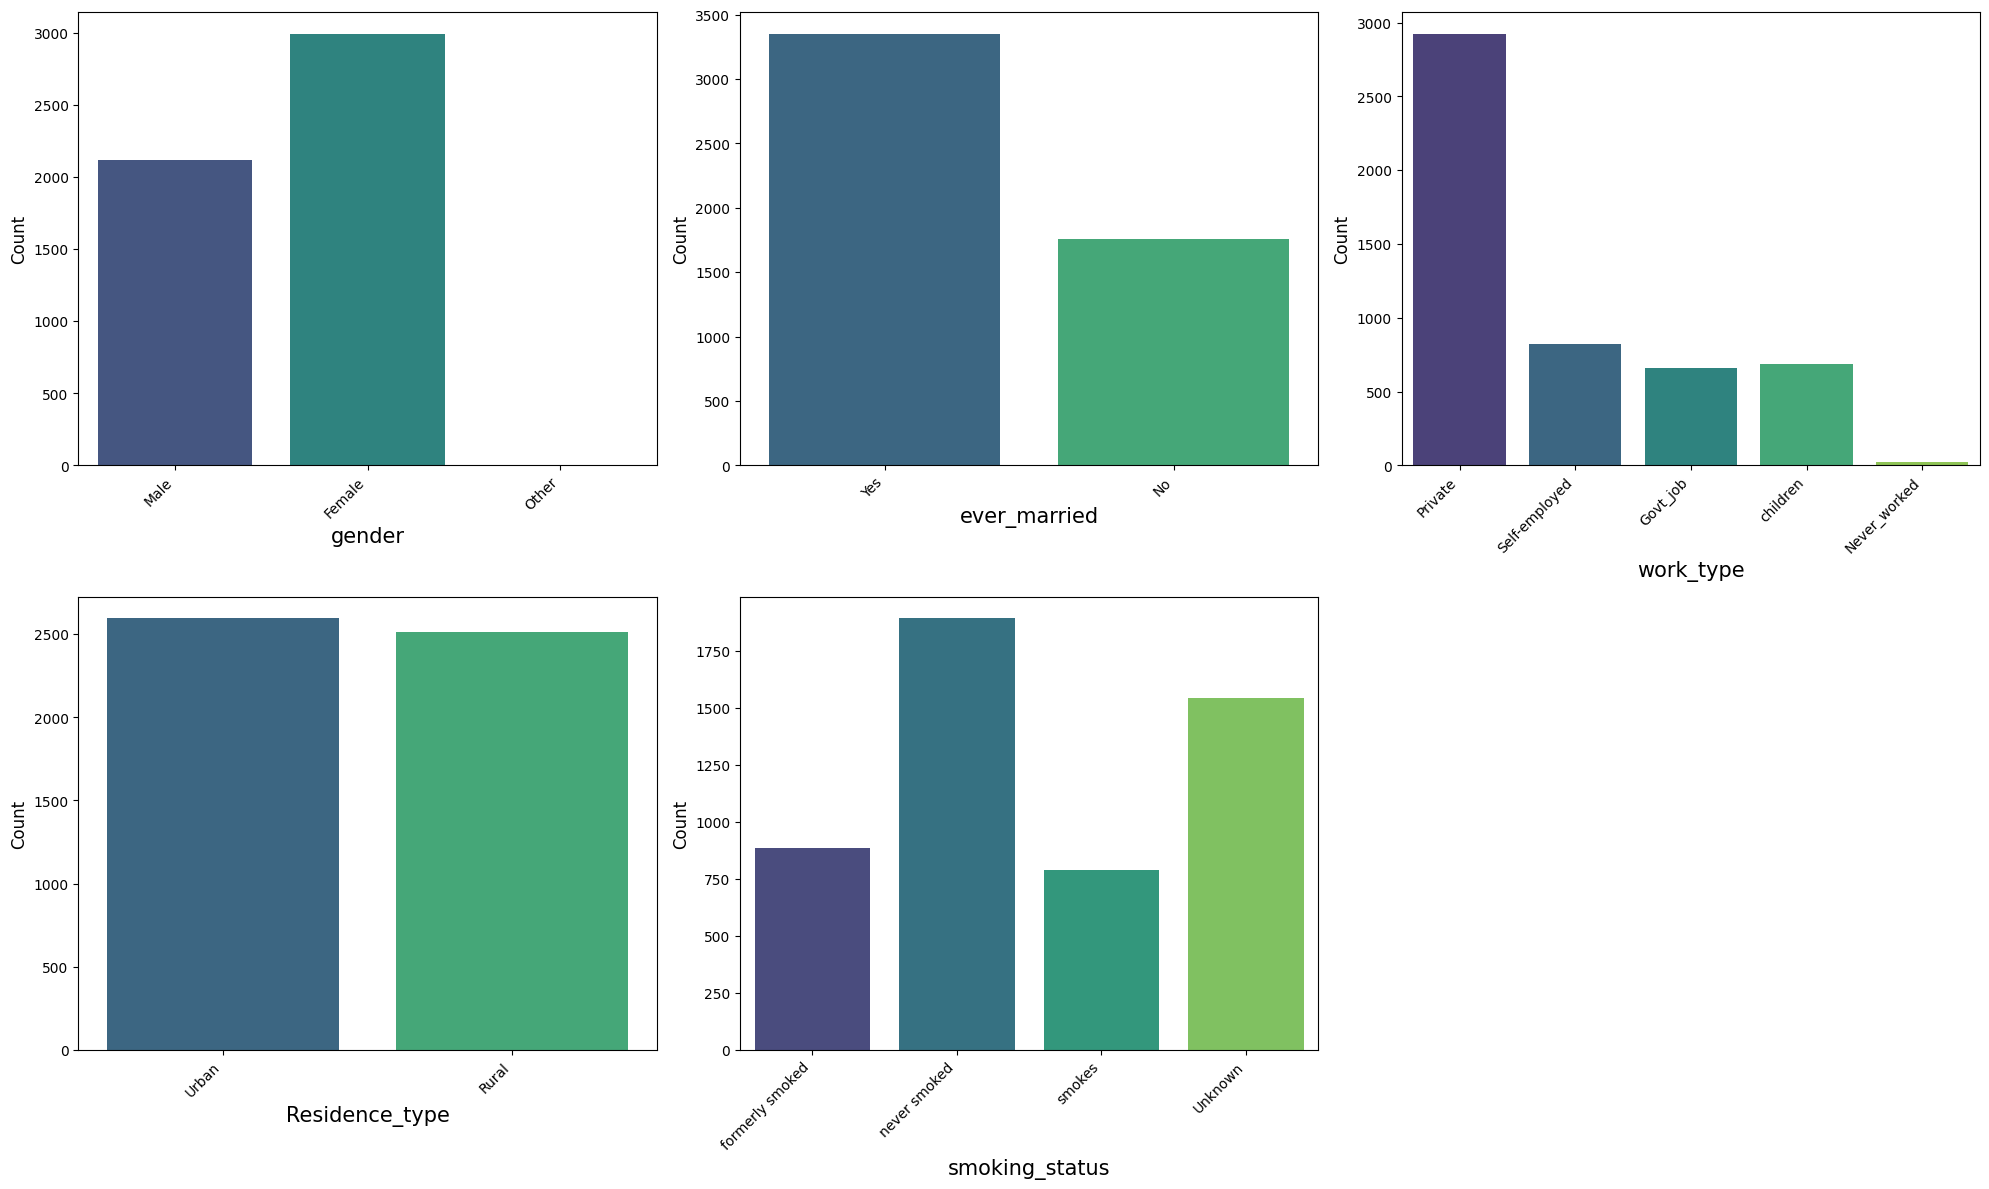


--- Relation between Categorical Features and Target (Stroke) ---


In [ ]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(20, 12)) # Adjusted figure size
plotnumber = 1
for column in categorical_features:
    if plotnumber <= len(categorical_features):
        ax = plt.subplot(2, 3, plotnumber) # Adjusted subplot grid
        sns.countplot(x=df[column], ax=ax, palette='viridis')
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plotnumber += 1
plt.tight_layout()
plt.show()


print("\n--- Relation between Categorical Features and Target (Stroke) ---")

/tmp/ipython-input-14-512385198.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[column], y=df['stroke'], ax=ax, palette='coolwarm')
/tmp/ipython-input-14-512385198.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[column], y=df['stroke'], ax=ax, palette='coolwarm')
/tmp/ipython-input-14-512385198.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[column], y=df['stroke'], ax=ax, palette='coolwarm')
/tmp/ipython-input-14-512385198.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

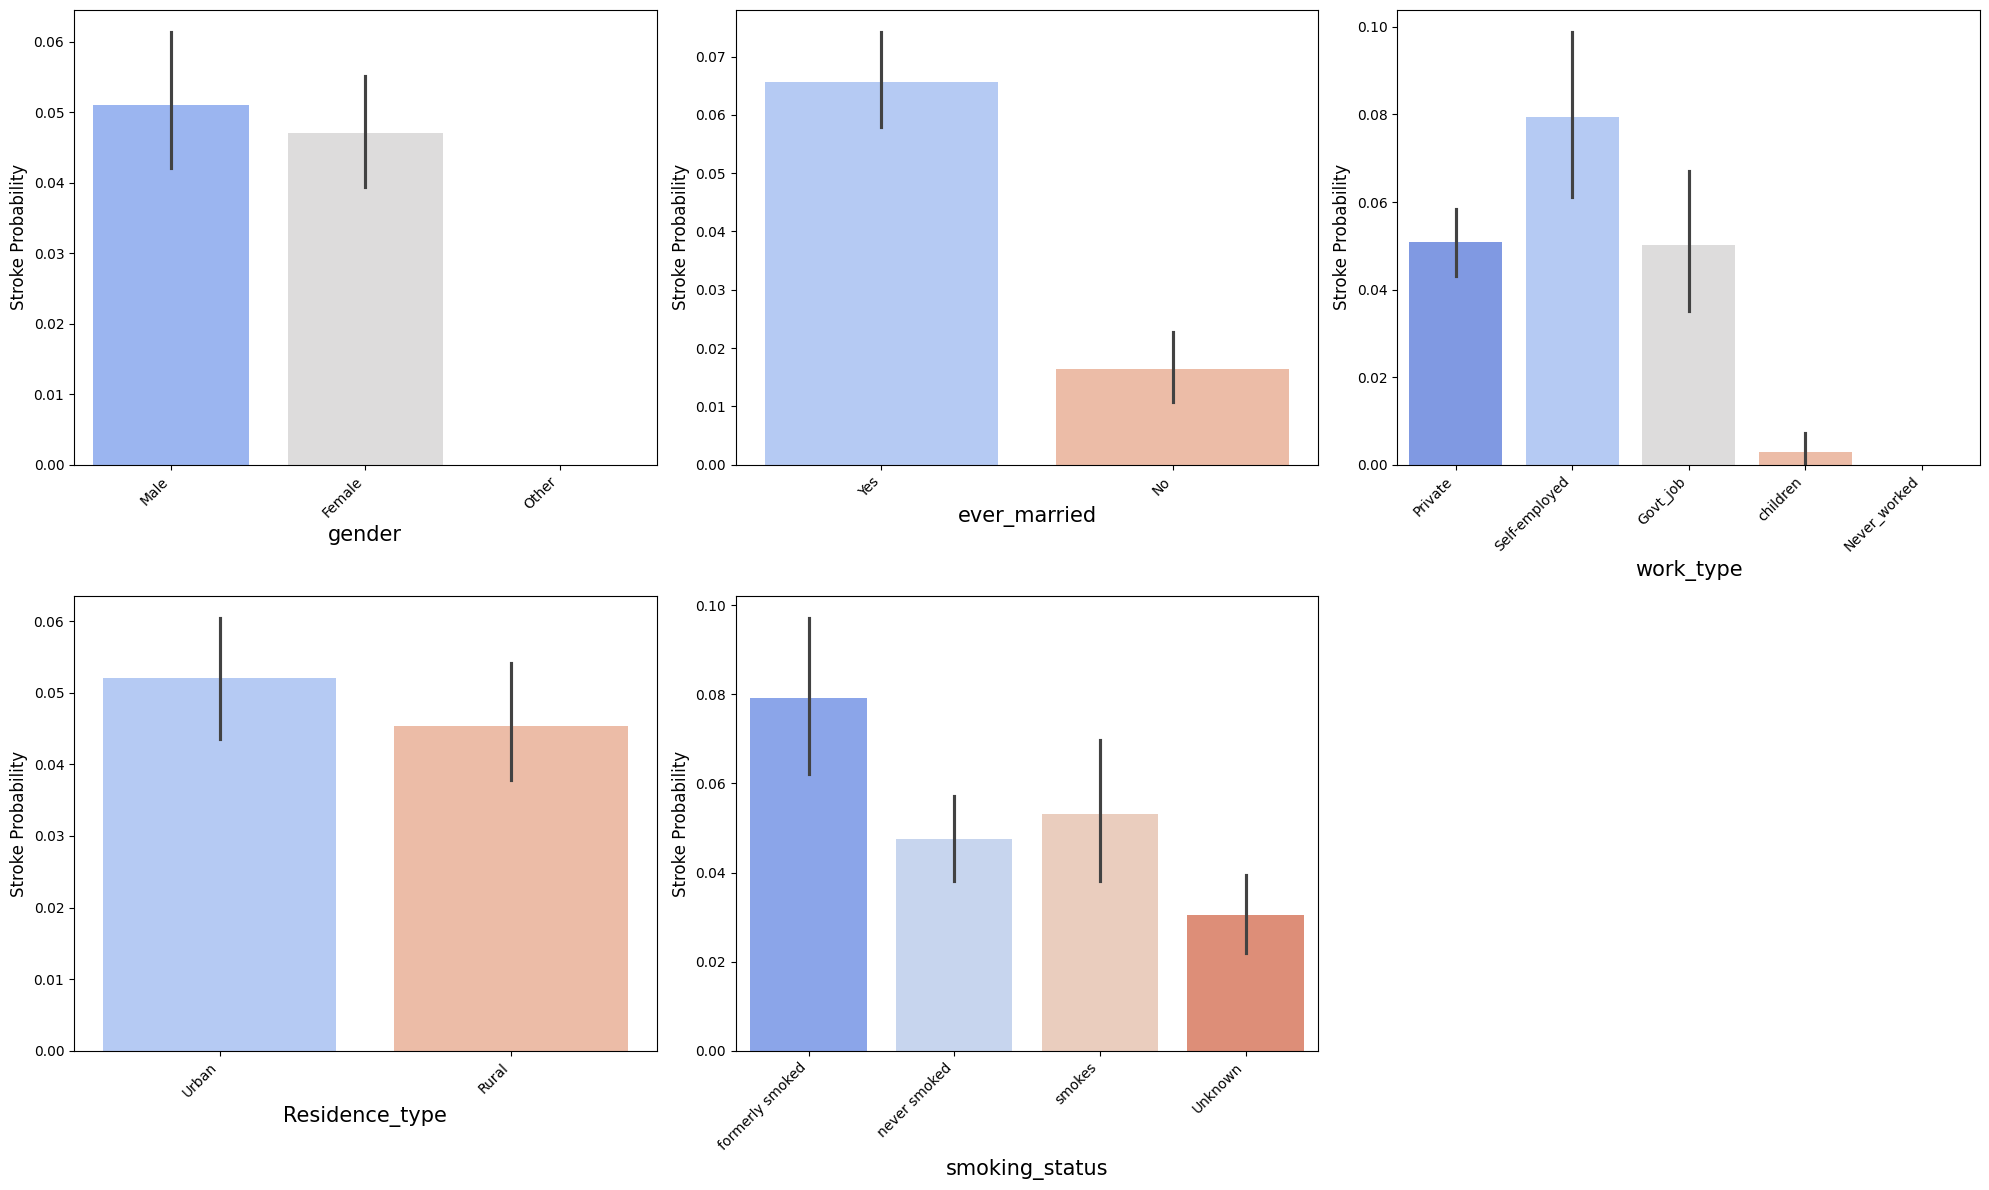

In [ ]:
plt.figure(figsize=(20, 12))
plotnumber = 1
for column in categorical_features:
    if plotnumber <= len(categorical_features):
        ax = plt.subplot(2, 3, plotnumber)
        sns.barplot(x=df[column], y=df['stroke'], ax=ax, palette='coolwarm')
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Stroke Probability', fontsize=12)
        plt.xticks(rotation=45, ha='right')
    plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
# lets see outliers
# import seaborn as sns
# plt.figure(figsize=(20,30), facecolor='white')
# plotnumber=1

# for column in cols:
#     if plotnumber<=15:
#         ax = plt.subplot(5,3,plotnumber)
#         sns.boxplot(cols[column])
#         plt.xlabel(column, fontsize=20)

#     plotnumber+=1
# plt.tight_layout()

In [ ]:


### 5. Feature Engineering: Handling Categorical Columns

# One-hot encoding for categorical features
# 'gender' column has an 'Other' category with very few samples,
# which might be dropped or handled specifically if it causes issues.
# For now, keeping as is but considering drop_first=True to avoid multicollinearity.

gender_encoded = pd.get_dummies(df[['gender']], prefix='gender', drop_first=True)
married_encoded = pd.get_dummies(df[['ever_married']], prefix='married', drop_first=True)
work_encoded = pd.get_dummies(df[['work_type']], prefix='work', drop_first=True)
residence_encoded = pd.get_dummies(df[['Residence_type']], prefix='residence', drop_first=True)
smoking_encoded = pd.get_dummies(df[['smoking_status']], prefix='smoking', drop_first=True)

# Combine original numerical features with new encoded categorical features
data = pd.concat([
    df.drop(columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'id'], axis=1),
    gender_encoded,
    married_encoded,
    work_encoded,
    residence_encoded,
    smoking_encoded
], axis=1)

print("\n--- Data after One-Hot Encoding and dropping original categorical/id columns ---")
print(data.head())
print(f"New shape: {data.shape}")
print(f"New columns: {data.columns.tolist()}")


--- Data after One-Hot Encoding and dropping original categorical/id columns ---
    age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  67.0             0              1             228.69  36.600000       1   
1  61.0             0              0             202.21  28.893237       1   
2  80.0             0              1             105.92  32.500000       1   
3  49.0             0              0             171.23  34.400000       1   
4  79.0             1              0             174.12  24.000000       1   

   gender_Male  gender_Other  married_Yes  work_Never_worked  work_Private  \
0         True         False         True              False          True   
1        False         False         True              False         False   
2         True         False         True              False          True   
3        False         False         True              False          True   
4        False         False         True              Fals


--- Correlation of Features with 'stroke' ---


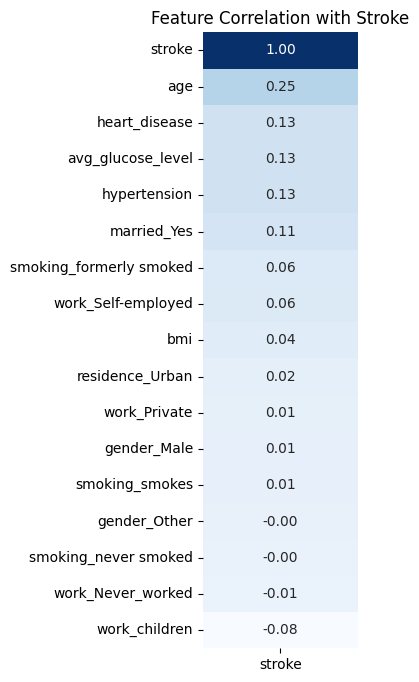

In [ ]:
### 6. Correlation Analysis

# Analyze the correlation of features with the target variable 'stroke'
print("\n--- Correlation of Features with 'stroke' ---")
corr = data.corr(numeric_only=True)['stroke'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2, 8))
sns.heatmap(corr, cmap='Blues', cbar=False, annot=True, fmt=".2f") # fmt=".2f" for 2 decimal places
plt.title('Feature Correlation with Stroke')
plt.show()

In [ ]:
### 7. Data Splitting and Scaling

# Define features (x) and target (y)
x = data.drop("stroke", axis=1)
y = data[['stroke']]

print(f"\nShape of features (x): {x.shape}")
print(f"Shape of target (y): {y.shape}")


Shape of features (x): (5110, 16)
Shape of target (y): (5110, 1)


In [ ]:
# Standardize the numerical features
# Apply StandardScaler to the entire feature set (x) after one-hot encoding.
# This ensures all numerical features are scaled consistently.
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# Convert scaled features back to a DataFrame for easier inspection, maintaining column names
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
print("\n--- First 5 rows of Scaled Features (x) ---")
print(x_scaled_df.head())



--- First 5 rows of Scaled Features (x) ---
        age  hypertension  heart_disease  avg_glucose_level           bmi  \
0  1.051434     -0.328602       4.185032           2.706375  1.001234e+00   
1  0.786070     -0.328602      -0.238947           2.121559  4.615554e-16   
2  1.626390     -0.328602       4.185032          -0.005028  4.685773e-01   
3  0.255342     -0.328602      -0.238947           1.437358  7.154182e-01   
4  1.582163      3.043196      -0.238947           1.501184 -6.357112e-01   

   gender_Male  gender_Other  married_Yes  work_Never_worked  work_Private  \
0     1.189990      -0.01399     0.723884          -0.065756      0.864297   
1    -0.840343      -0.01399     0.723884          -0.065756     -1.157010   
2     1.189990      -0.01399     0.723884          -0.065756      0.864297   
3    -0.840343      -0.01399     0.723884          -0.065756      0.864297   
4    -0.840343      -0.01399     0.723884          -0.065756     -1.157010   

   work_Self-employed  

In [ ]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42, stratify=y) # Added stratify for imbalanced target

print(f"\nShape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")



Shape of x_train: (3423, 16)
Shape of x_test: (1687, 16)
Shape of y_train: (3423, 1)
Shape of y_test: (1687, 1)


In [ ]:
### 8. Model Training and Evaluation (With MLflow)
!pip install mlflow
import mlflow
import mlflow.sklearn
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle

# Define your models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=1),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Set experiment
mlflow.set_experiment("Stroke Prediction Experiment")

best_accuracy = 0
best_model = None
best_model_name = ""

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        # Train
        model.fit(x_train, y_train.values.ravel())

        # Predict
        y_pred = model.predict(x_test)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Log params & metrics
        mlflow.log_param("model_type", name)
        mlflow.log_metric("accuracy", acc)

        for label, scores in report.items():
            if isinstance(scores, dict):
                for metric_name, value in scores.items():
                    mlflow.log_metric(f"{label}_{metric_name}", value)

        # Save Confusion Matrix
        disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        disp.figure_.suptitle(f"Confusion Matrix: {name}")
        cm_filename = f"conf_matrix_{name}.png"
        plt.savefig(cm_filename)
        plt.close()
        mlflow.log_artifact(cm_filename)

        # Track best model
        if acc > best_accuracy:
            best_accuracy = acc
            best_model = model
            best_model_name = name

# ✅ Register the best model
with mlflow.start_run(run_name="Register_Best_Model"):
    mlflow.log_param("best_model_name", best_model_name)
    mlflow.log_metric("best_accuracy", best_accuracy)

    mlflow.sklearn.log_model(
        sk_model=best_model,
        artifact_path="model",
        registered_model_name="StrokePredictionModel"
    )

print(f"\n✅ Registered best model ({best_model_name}) with accuracy: {best_accuracy:.4f}")

# ✅ Save model and scaler for app usage
with open("model_pickle.pkl", 'wb') as f:
    pickle.dump(best_model, f)
with open("scaler.pkl", 'wb') as f:
    pickle.dump(scaler, f)


# print("--- Training and Evaluating Different Models with MLflow ---")

# # Initialize MLflow experiment
# mlflow.set_experiment("Stroke Prediction Experiment")

# # Dictionary of models to evaluate
# models = {
#     'Decision Tree': DecisionTreeClassifier(random_state=1),
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'K-Nearest Neighbors': KNeighborsClassifier(),
#     'Support Vector Machine': SVC(probability=True),
#     'Logistic Regression': LogisticRegression(max_iter=1000)
# }

# for name, model in models.items():
#     with mlflow.start_run(run_name=name):
#         # Train the model
#         model.fit(x_train, y_train.values.ravel())

#         # Make predictions
#         y_pred = model.predict(x_test)

#         # Evaluate the model
#         acc = accuracy_score(y_test, y_pred)
#         report = classification_report(y_test, y_pred, output_dict=True)

#         # Log parameters, metrics, and model
#         mlflow.log_param("model_type", name)
#         mlflow.log_metric("accuracy", acc)

#         # Log each class precision, recall, and f1-score
#         for label, scores in report.items():
#             if isinstance(scores, dict):  # skip 'accuracy' which is a float
#                 for metric_name, value in scores.items():
#                     mlflow.log_metric(f"{label}_{metric_name}", value)

#         # Log model
#         mlflow.sklearn.log_model(model, f"{name}_model")

#         # Optional: Save and log confusion matrix as an artifact
#         from sklearn.metrics import ConfusionMatrixDisplay
#         import matplotlib.pyplot as plt

#         disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
#         disp.figure_.suptitle(f"Confusion Matrix: {name}")
#         cm_filename = f"conf_matrix_{name}.png"
#         plt.savefig(cm_filename)
#         plt.close()
#         mlflow.log_artifact(cm_filename)

# print("\n✅ All models trained and logged to MLflow. Run `mlflow ui` to visualize results.")


# from sklearn.metrics import ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# # Set experiment
# mlflow.set_experiment("Stroke Prediction Experiment")

# for name, model in models.items():
#     with mlflow.start_run(run_name=name):

#         # Train the model
#         model.fit(x_train, y_train.values.ravel())

#         # Predict
#         y_pred = model.predict(x_test)

#         # Metrics
#         acc = accuracy_score(y_test, y_pred)
#         report = classification_report(y_test, y_pred, output_dict=True)

#         # Log params and metrics
#         mlflow.log_param("model_type", name)
#         mlflow.log_metric("accuracy", acc)

#         for label, scores in report.items():
#             if isinstance(scores, dict):
#                 for metric_name, value in scores.items():
#                     mlflow.log_metric(f"{label}_{metric_name}", value)

#         # ✅ Log model + register it in MLflow Model Registry
#         mlflow.sklearn.log_model(
#             sk_model=model,
#             artifact_path="model",
#             registered_model_name="StrokePredictionModel"  # <- Model registry name
#         )

#         # ✅ Save Confusion Matrix
#         disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
#         disp.figure_.suptitle(f"Confusion Matrix: {name}")
#         cm_filename = f"conf_matrix_{name}.png"
#         plt.savefig(cm_filename)
#         plt.close()

#         mlflow.log_artifact(cm_filename)

# print("\n✅ All models trained, tracked, and registered in MLflow.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.2/676.2 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 14.9 MB/s eta 0:00:00


2025/07/17 14:02:36 INFO mlflow.tracking.fluent: Experiment with name 'Stroke Prediction Experiment' does not exist. Creating a new experiment.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c


✅ Registered best model (Logistic Regression) with accuracy: 0.9520


Successfully registered model 'StrokePredictionModel'.
Created version '1' of model 'StrokePredictionModel'.


In [ ]:
### 9. Save the Best Model

# It's good practice to save the best performing model. In this case, the GridSearchCV's best estimator.
import pickle
MODEL_FILENAME = 'model_pickle.pkl'

# In this case, saving the last trained 'model' as 'best_svc_model' was not defined.
# If hyperparameter tuning is performed, the best model should be saved here.
with open(MODEL_FILENAME, 'wb') as file:
    pickle.dump(model, file) # Changed from best_svc_model to model

print(f"\nBest model (SVC) saved to '{MODEL_FILENAME}'")

# You might also want to save the scaler used for preprocessing, as it's needed for new predictions.
SCALER_FILENAME = 'scaler.pkl'
with open(SCALER_FILENAME, 'wb') as file:
    pickle.dump(scaler, file)
print(f"Scaler saved to '{SCALER_FILENAME}'")


Best model (SVC) saved to 'model_pickle.pkl'
Scaler saved to 'scaler.pkl'


In [ ]:
# --- Begin Security Testing ---
import numpy as np
from sklearn.metrics import accuracy_score

def add_adversarial_noise(X, epsilon=0.05):
    np.random.seed(42)
    noise = epsilon * np.sign(np.random.randn(*X.shape))
    return X + noise

x_test_adv = add_adversarial_noise(x_test)
y_pred_adv = model.predict(x_test_adv)

adv_acc = accuracy_score(y_test, y_pred_adv)
print(f"🔐 Adversarial Test Accuracy: {adv_acc:.4f}")

import mlflow

with mlflow.start_run(run_name="Security_Test_Adversarial"):
    mlflow.log_param("attack_type", "random_noise")
    mlflow.log_param("epsilon", 0.05)
    mlflow.log_metric("adv_accuracy", adv_acc)
    mlflow.sklearn.log_model(model, "adversarial_model")

    print("✅ Adversarial test logged to MLflow.")


2025/07/17 14:02:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🔐 Adversarial Test Accuracy: 0.9520


2025/07/17 14:02:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Adversarial test logged to MLflow.
